In [2]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv("/kaggle/input/customer-reviews/combined_khaadi_files.csv")

In [5]:
# Rename the single column to something meaningful (if unnamed)
if df.columns[0] != 'review':
    df.columns = ['review']

In [6]:
# Drop rows with NaN or empty reviews
df = df.dropna(subset=['review'])
df = df[df['review'].str.strip() != ""]

In [7]:
# Optional: Basic text cleaning function
def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^A-Za-z0-9\s]+", "", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text)  # Remove extra spaces
    return text.strip()


In [8]:
df['cleaned_review'] = df['review'].apply(clean_text)

In [9]:
# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

In [10]:
# Function to get sentiment label
def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [11]:
# Apply sentiment analysis
df['sentiment'] = df['cleaned_review'].apply(get_sentiment)

In [15]:
# ===========================
# 📊 Summary Statistics
# ===========================

print("Sentiment Distribution:")
print(df['sentiment'].value_counts())
print("\nPercentage Distribution:")
print(df['sentiment'].value_counts(normalize=True) * 100)


Sentiment Distribution:
sentiment
Positive    440
Negative    203
Neutral     111
Name: count, dtype: int64

Percentage Distribution:
sentiment
Positive    58.355438
Negative    26.923077
Neutral     14.721485
Name: proportion, dtype: float64


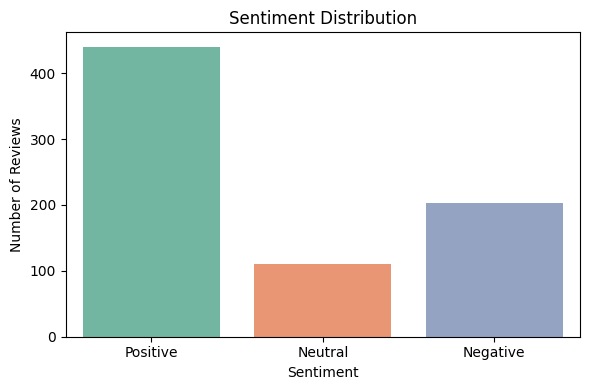

In [19]:
# ===========================
# 📈 Bar Chart of Sentiment
# ===========================

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='Set2', order=['Positive', 'Neutral', 'Negative'])
plt.title("Sentiment Distribution")
plt.ylabel("Number of Reviews")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()

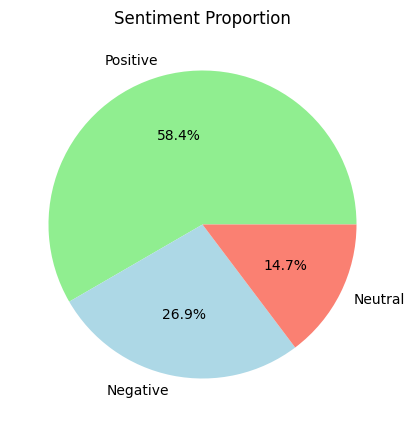

In [20]:
# ===========================
# 🥧 Pie Chart
# ===========================

sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen','lightblue','salmon'])
plt.title("Sentiment Proportion")
plt.show()

In [21]:
# ===========================
# 📚 Most Frequent Words
# ===========================

def get_top_words(sentiment, n=10):
    words = " ".join(df[df['sentiment'] == sentiment]['cleaned_review']).lower().split()
    common_words = Counter(words).most_common(n)
    return pd.DataFrame(common_words, columns=['Word', 'Frequency'])

for label in ['Positive', 'Neutral', 'Negative']:
    print(f"\nTop words in {label} reviews:")
    print(get_top_words(label))



Top words in Positive reviews:
   Word  Frequency
0     i        671
1   the        650
2   and        561
3    to        370
4    my        287
5     a        271
6   was        256
7    is        239
8    it        216
9  laam        211

Top words in Neutral reviews:
   Word  Frequency
0     i         32
1   and         30
2    to         27
3   the         21
4    on         17
5  they         16
6    of         15
7     a         15
8    it         14
9   not         13

Top words in Negative reviews:
    Word  Frequency
0      i        500
1    the        472
2    and        418
3     to        330
4   they        289
5     my        212
6      a        209
7    for        183
8  order        179
9     is        179


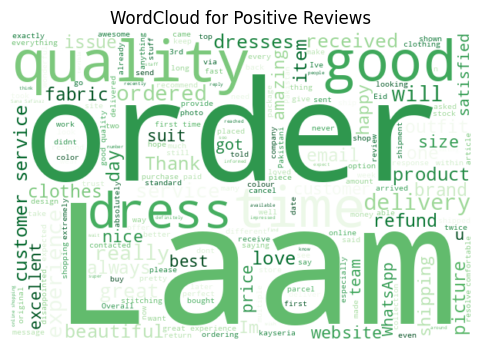

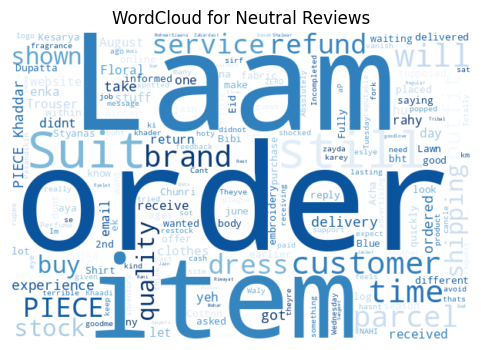

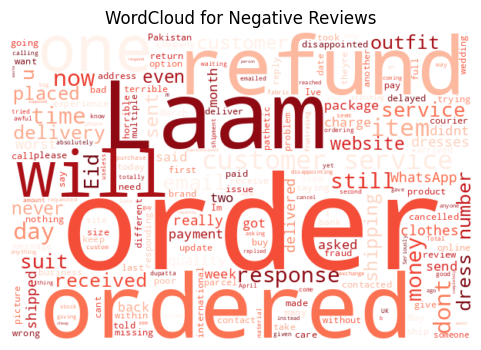

In [23]:
# WordCloud Visualization
for label, color in zip(['Positive', 'Neutral', 'Negative'], ['Greens', 'Blues', 'Reds']):
    text = " ".join(df[df['sentiment'] == label]['cleaned_review'])
    wordcloud = WordCloud(width=600, height=400, background_color='white', colormap=color).generate(text)
    plt.figure(figsize=(6,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {label} Reviews")
    plt.show()

In [13]:
# Save the result to a new CSV
output_path = "/kaggle/working/cloth_sentiment_output.csv"
df.to_csv(output_path, index=False)

In [14]:
print(f"Sentiment analysis completed. Output saved to: {output_path}")

Sentiment analysis completed. Output saved to: /kaggle/working/cloth_sentiment_output.csv
